## Analyzing Birth Statistics in California fro Medi Cal Patients
Salma Ibrahim, Dalia Cruz, Lisette Vasquez Perez

## Project Overview

In this project, we aim to design and implement a modular, reusable software system for analyzing real-world birth statistics data from California. Our focus is to apply **functional** and **object-oriented programming (OOP)** concepts in building a structured data analysis tool that can load, clean, transform, and visualize key patterns in the dataset.

We will also extract insights that answer meaningful public health questions related to maternal and infant health, while ensuring our code is clean, maintainable, and easy to test.

## 🎯 Goals and Learning Outcomes

- Enhance problem-solving and critical thinking through real-world data exploration.
- Apply **data cleaning**, **missing value handling**, and **data transformation** techniques.
- Perform **exploratory data analysis (EDA)** to identify trends and correlations.
- Utilize **object-oriented programming** to structure analysis tasks into reusable classes.
- Leverage **functional programming** (e.g., lambda functions, `map`, `filter`) for data transformation.
- Create clear and compelling **visualizations** using `pandas`, `matplotlib`, and `seaborn`.
- Design clean, modular code using separation of concerns and reusable components.
- Use **UML diagrams** to communicate program architecture and design.

## 🧾 Dataset Background

- **Dataset**: Medi-Cal Birth Statistics by Select Characteristics  
- **Source**: [data.ca.gov](https://catalog.data.gov/dataset/medi-cal-birth-statistics-by-select-characteristics-and-california-resident-hospital-birth-caf33)
- **Format**: CSV
- **Features include**:
  - Mother's age
  - Mother's healh details
  - Mother's socioeconomical details
  - Birth weight
  - Prenatal care received
  - Delivery method
  - Infant health outcomes
  - Insurance type (e.g., Medi-Cal)

We chose this dataset because it reflects important real-world issues in maternal and infant health, which can inform healthcare policy, patient outreach, and education.

---

## ❓ Research Questions We Aim to Explore

1. Does maternal age impact birth outcomes (e.g., birth weight)?
2. Is there a difference in outcomes between Medi-Cal and non-Medi-Cal patients?
3. How does the number of prenatal care visits affect delivery method or outcome?
4. Are there regional differences in birth statistics within California?
5. What trends exist over time (e.g., changes in delivery methods or prenatal care)?

---

## 🔧 Planned Implementation Approach

- **Data Cleaning**:
      
  - Remove or impute missing data
  - Megre appropriate data sets
  - Standardize column names and data types

- **Object-Oriented Components**:
  - `DataLoader` class to handle file loading and basic preprocessing
  - `Analyzer` class to compute descriptive statistics and correlations
  - `Visualizer` class to produce all relevant plots

- **Functional Programming**:
  - Use `lambda`, `map`, `filter`, and higher-order functions for data transformation
  - Modular design for reusability across different datasets

- **Planned Visualizations**:
  - Histograms and box plots of birth weight and maternal age
  - Bar charts for categorical features
  - Heatmap of correlations

---

## 📈 Expected Results and Challenges

We expect to uncover statistically significant relationships between demographic or care-related factors and birth outcomes. Potential challenges include:
- Incomplete or inconsistent data
- Bias in reported metrics (e.g., underreporting)
- Limited documentation


## 📚 References

- Dataset: https://catalog.data.gov/dataset/medi-cal-birth-statistics-by-select-characteristics-and-california-resident-hospital-birth-caf33


In [1]:
## Imports and Setup 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functools import reduce

In [8]:

# Load datasets
data_dir = "data"

datasets = {
    "ethnicity": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-maternal-race-ethnicity-and-select-birth-characteristics.csv"),
    "birthweight": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-birthweight-range-and-select-birth-characteristics.csv"),
    "preterm": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-very-preterm-status-and-select-birth-characteristics.csv"),
    "gestation": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-length-of-gestation-and-select-birth-characteristics.csv"),
    "education": pd.read_csv(f"{data_dir}/ca-resident-births-by-cy-payer-method-of-delivery-and-select-birth-characteristics.csv"),
}

# Filter helper
def filter_df(df, grouper=None):
    if grouper:
        df = df[df["Grouper"] == grouper]
    return df
    

# 1. Maternal Age and Ethnicity vs Birth Outcomes
q1_age = filter_df(datasets["birthweight"], grouper="Maternal Age Group")
q1_ethnicity = filter_df(datasets["ethnicity"], grouper="Maternal Race/Ethnicity")
q1 = pd.merge(q1_age, q1_ethnicity, on=["Calendar Year", "Payer", "Grouper", "Birth Characteristic"], how="outer")
q1 = q1.drop(q1.columns[[ 6, 7]], axis=1)


# 2. Maternal Education vs Birth Outcomes
q2_education_delivery = filter_df(datasets["education"], grouper="Maternal Education Status")
q2_birthweight_education = filter_df(datasets["birthweight"], grouper="Maternal Education Status")
q2_gestation_education = filter_df(datasets["gestation"], grouper="Maternal Education Status")


# 3. Smoking During Pregnancy 
q3_smoking = filter_df(datasets["birthweight"], grouper="Smoking Status")

# 4. BMI and Birth Outcomes
q4_bmi = filter_df(datasets["birthweight"], grouper="Pre-Pregnancy Weight")

# 5. Racial Disparities in Birth Outcomes
q5_ethnicity_diabetes = filter_df(datasets["ethnicity"], grouper="Diabetes Status")
q5_ethnicity_hypertension = filter_df(datasets["ethnicity"], grouper="Hypertension Status")
q5_ethnicity_substance_use = filter_df(datasets["ethnicity"], grouper="Substance Use Status")
q5_ethnicity_smoking = filter_df(datasets["ethnicity"], grouper="Smoking Status")

q5_preterm = filter_df(datasets["preterm"], grouper="Maternal Race/Ethnicity")

q1




,Calendar Year,Payer,Birthweight Range,Grouper,Birth Characteristic,Number of Births
0,2007,Medi-Cal,Low Birthweight,Maternal Age Group,Ages 17 and Younger,1027
1,2007,Medi-Cal,Low Birthweight,Maternal Age Group,Ages 18-19,2000
2,2007,Medi-Cal,Low Birthweight,Maternal Age Group,Ages 20-24,5483
3,2007,Medi-Cal,Low Birthweight,Maternal Age Group,Ages 25-29,4240
4,2007,Medi-Cal,Low Birthweight,Maternal Age Group,Ages 30-34,2931
...,...,...,...,...,...,...
667,2022,Non-Medi-Cal,Unknown Birthweight,Maternal Age Group,Ages 20-24,5
668,2022,Non-Medi-Cal,Unknown Birthweight,Maternal Age Group,Ages 25-29,5
669,2022,Non-Medi-Cal,Unknown Birthweight,Maternal Age Group,Ages 30-34,7
670,2022,Non-Medi-Cal,Unknown Birthweight,Maternal Age Group,Ages 35 and Older,9


In [2]:
## Cleaning data for q2

# Filter for low birthweight-related outcomes
low_bw = q2[q2["Birth Characteristic"].str.contains("low birth", case=False, na=False)]

# Filter for preterm-related outcomes
preterm = q2[q2["Birth Characteristic"].str.contains("preterm", case=False, na=False)]

# Summarize low birthweight by education
low_bw_summary = low_bw.groupby("Grouper Value")["Number of Births"].sum().sort_values()

# Summarize preterm by education
preterm_summary = preterm.groupby("Grouper Value")["Number of Births"].sum().sort_values()



NameError: name 'q2' is not defined

In [27]:
## Cleaning data
#q1 
q1[(q1["Birth Characteristic"]== "Invalid Age") & (q1["Number of Births" ] >0)]


,Calendar Year,Payer,Birthweight Range,Grouper,Birth Characteristic,Number of Births
27,2007,Non-Medi-Cal,Low Birthweight,Maternal Age Group,Invalid Age,7
34,2007,Non-Medi-Cal,Normal Birthweight,Maternal Age Group,Invalid Age,25
69,2008,Non-Medi-Cal,Low Birthweight,Maternal Age Group,Invalid Age,9
76,2008,Non-Medi-Cal,Normal Birthweight,Maternal Age Group,Invalid Age,29
111,2009,Non-Medi-Cal,Low Birthweight,Maternal Age Group,Invalid Age,8
118,2009,Non-Medi-Cal,Normal Birthweight,Maternal Age Group,Invalid Age,24
125,2009,Non-Medi-Cal,Unknown Birthweight,Maternal Age Group,Invalid Age,1
153,2010,Non-Medi-Cal,Low Birthweight,Maternal Age Group,Invalid Age,8
160,2010,Non-Medi-Cal,Normal Birthweight,Maternal Age Group,Invalid Age,27
195,2011,Non-Medi-Cal,Low Birthweight,Maternal Age Group,Invalid Age,7


In [32]:
## Cleaning data
#q1 
q1["Birth Characteristic"].unique()
## Getting rid of rows with invalid age since not significant to our findings
valid_ages=['Ages 17 and Younger', 'Ages 18-19', 'Ages 20-24', 'Ages 25-29', 'Ages 30-34', 'Ages 35 and Older']



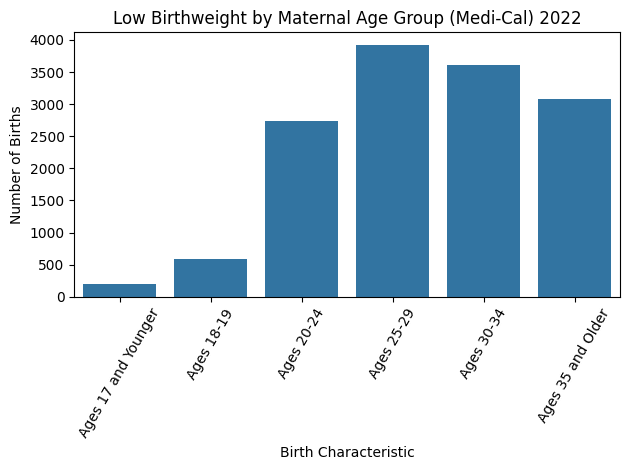

In [37]:
# Filter to Medi-Cal and latest year
q1_filtered = q1[(q1["Payer"] == "Medi-Cal") & (q1["Calendar Year"] == q1["Calendar Year"].max()) & q1["Birth Characteristic"].isin(valid_ages)]


# Example: Low birthweight by Maternal Age Group
age_lb = q1_filtered[q1_filtered["Birthweight Range"] == "Low Birthweight"]
sns.barplot(data=age_lb, x="Birth Characteristic", y="Number of Births")
plt.title("Low Birthweight by Maternal Age Group (Medi-Cal) 2022")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()





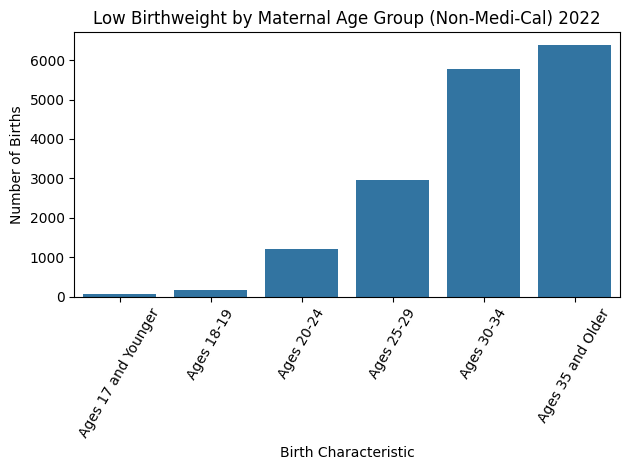

In [39]:
# Filter to Medi-Cal and latest year

q1_filtered = q1[(q1["Payer"] == "Non-Medi-Cal") & (q1["Calendar Year"] == q1["Calendar Year"].max()) & q1["Birth Characteristic"].isin(valid_ages)]


# Example: Low birthweight by Maternal Age Group
age_lb = q1_filtered[q1_filtered["Birthweight Range"] == "Low Birthweight"]
sns.barplot(data=age_lb, x="Birth Characteristic", y="Number of Births")
plt.title("Low Birthweight by Maternal Age Group (Non-Medi-Cal) 2022")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()





In [ ]:
## Exploritory Data Analysis


In [ ]:
## Exploritory Data Analysis

In [ ]:
## Exploritory Data Analysis

In [ ]:
## Exploritory Data Analysis

In [ ]:
##Questions to be answered with data

In [ ]:
##Questions to be answered with data

In [ ]:
##Questions to be answered with data

In [ ]:
##Questions to be answered with data

In [ ]:
##Questions to be answered with data

In [ ]:
##Visualisations Summary

In [ ]:
##Visualisations Summary

In [ ]:
##Visualisations Summary

In [ ]:
##Visualisations Summary

In [ ]:
##Conclusions